### Exercise Hurricane Michael - geopanda
- Download the hurricaneMichael.csv and US_states(5m).json files (Links to an external site.) for this assignment.
- Using the geopandas library, turn the latitude and longitude columns into a geographical Point data type then make a geodataframe. Plot the path of Hurricane Michael onto the US map in the GeoJSON file.Using the geopandas library, turn the latitude and longitude columns into a geographical Point data type then make a geodataframe. Plot the path of Hurricane Michael onto the US map in the GeoJSON file.

In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt
from descartes import PolygonPatch

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude



In [2]:
#
location = "C:/dataSources/hurricaneMichael.csv"

#load data into dataframe
df = pd.read_csv(location)
df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/6/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven
1,1A,10/6/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila
2,2,10/6/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila
3,2A,10/7/2018 2:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg
4,3,10/7/2018 5:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg


In [3]:
df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [4]:
# Filter only not null values
hurricaneDf= df.loc[(df['Lat'].notnull() & (df['Long'].notnull()))]

In [5]:
# There is not any null value
hurricaneDf.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

### Instructions
The longitude column data should be turned into negative 
values(data source listed longitude direction instead of positive/negative)

In [6]:
# The longitude column data should be turned into negative values
df['Long'] = 0 - df['Long']

#make a new column to hold the longitude & latitude as a list
df['Coordinates'] = list(df[['Long', 'Lat']].values)

# dfHurricane= df.copy()

In [7]:
df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,Coordinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,"[-86.6, 18.0]"
1,1A,10/6/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,"[-86.6, 18.3]"
2,2,10/6/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,"[-86.6, 18.8]"
3,2A,10/7/2018 2:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,"[-87.1, 18.4]"
4,3,10/7/2018 5:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,"[-86.9, 18.6]"


In [8]:
#convert the coordinates to a geolocation type
df['Coordinates'] = df['Coordinates'].apply(Point)

In [9]:
df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,Coordinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/6/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/6/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/7/2018 2:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/7/2018 5:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,POINT (-86.90000000000001 18.6)


In [10]:
#coordinates column with geolocation data is just a regular pandas Series type
type(df['Coordinates'])

pandas.core.series.Series

In [11]:
# longitud and latitide for geometry parameter
df = gpd.GeoDataFrame(df, geometry='Coordinates')
df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,Coordinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,POINT (-86.60000 18.00000)
1,1A,10/6/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,POINT (-86.60000 18.30000)
2,2,10/6/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,POINT (-86.60000 18.80000)
3,2A,10/7/2018 2:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,POINT (-87.10000 18.40000)
4,3,10/7/2018 5:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,POINT (-86.90000 18.60000)


In [12]:
# df variable is no a regular(normal) dataframe variable, it is GeoDataFrame variable
type(df)

geopandas.geodataframe.GeoDataFrame

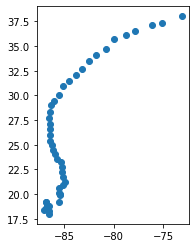

In [13]:
# The only column that is plotting is Coordinates, which actually is a Point
df.plot()

### Instructions
After loading the US_states(5m).json file as a geodataframe, use the following code to create a geodataframe 
that only contains the contiguous U
nited States (48 states):

In [15]:
# Load a Json file and  plot the states
# import file that contains a world map shape polygons
# will use to plot the coordinates of the hurricane
filepath = "C:/dataSources/US_states(5m).json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
mapDf = gpd.read_file(filepath)
mapDf.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


[]

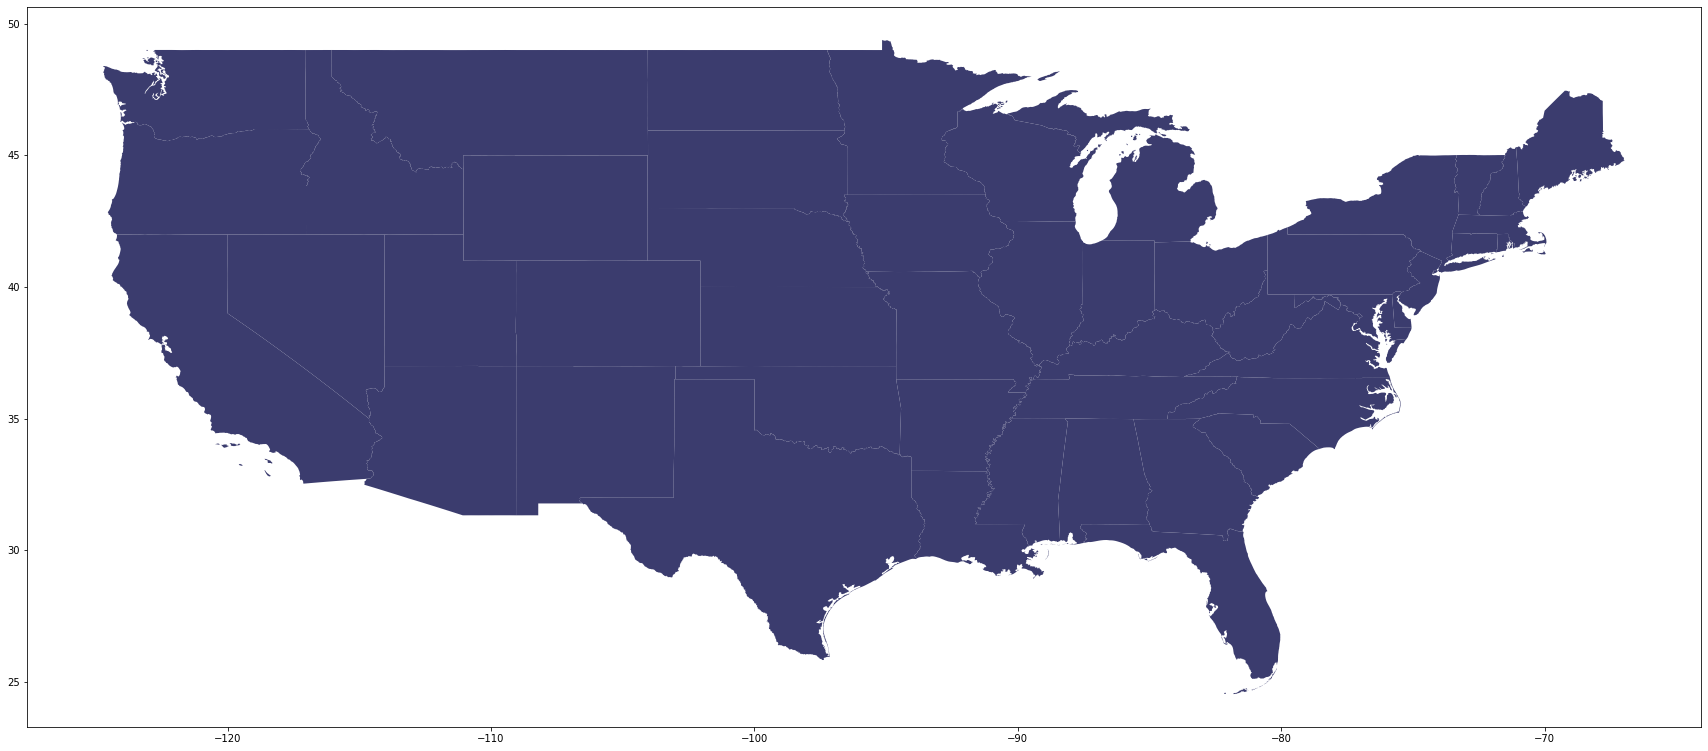

In [16]:
# Exclude Alaska and Hawaii and 'Puerto Rico' for now
map48 = mapDf.loc[mapDf['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False].plot(figsize=(30,20), 
        color='#3B3C6E');

map48.plot()

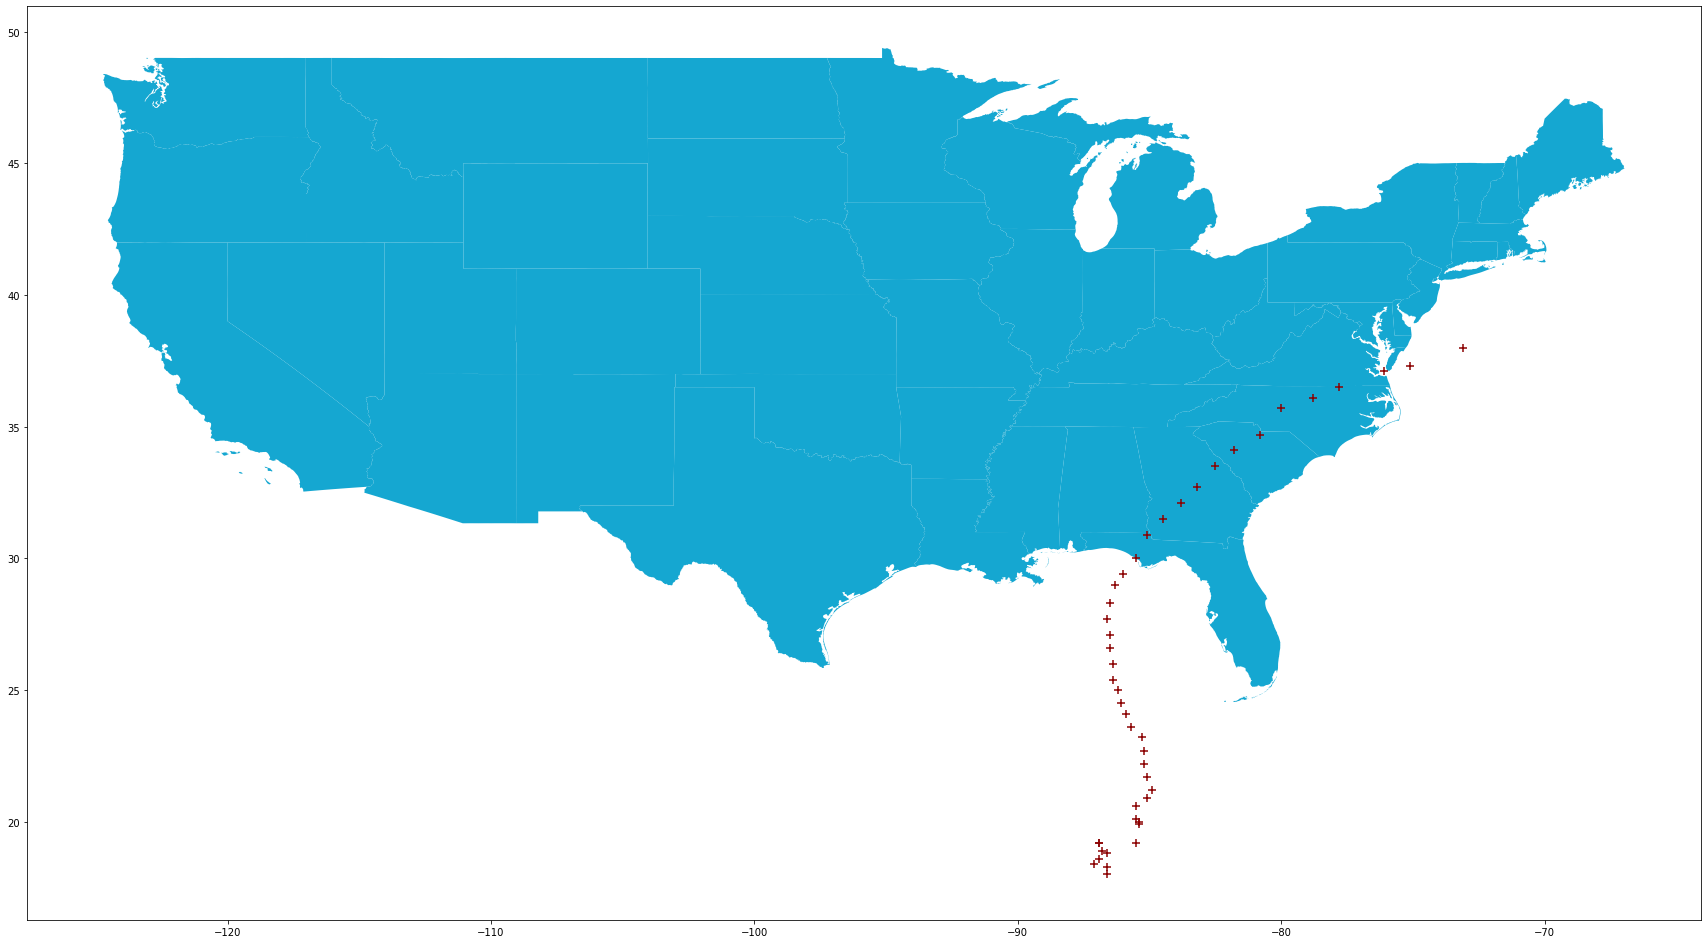

In [17]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = mapDf.loc[mapDf['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False].plot(ax=ax, color='#15A7D1');



# plotting the hurricane position on top with red color to stand out:
df.plot(ax=base, color='darkred', marker="+", markersize=60);